# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(font_scale=1.3)
np.random.seed(42)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading data


In [0]:
from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

In [3]:
df = pd.DataFrame(data = np.c_[data, target], columns=feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
data = data[:, [0,1]]
target = df['target'].apply(int).values

print(f' {data[:5]}\n')
print(f'{target[:5]}')

 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

[0 0 0 0 0]


# Random forest

In [5]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state =42)
classifier.fit(data, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [6]:
classifier.score(data, target)

0.9266666666666666

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



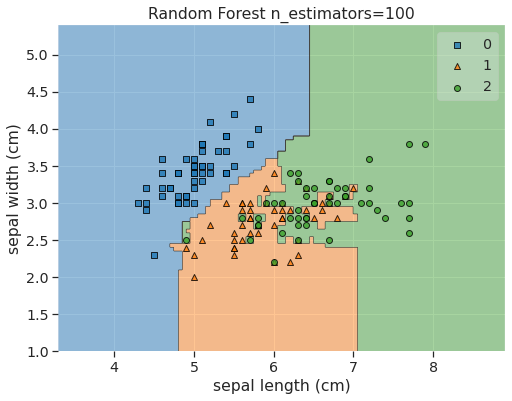

In [7]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8,6))
plot_decision_regions(data, target, classifier)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Random Forest n_estimators=100')
plt.show()

# All Feature

In [0]:
data = all_data['data']
targets = all_data['target']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,targets)

print(f'X_train shape: ', X_train.shape)
print(f'X_test shape: ', X_test.shape)
print(f'y_train shape: ', y_train.shape)
print(f'y_test shape: ', y_test.shape)

X_train shape:  (112, 4)
X_test shape:  (38, 4)
y_train shape:  (112,)
y_test shape:  (38,)


In [13]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [14]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [15]:
classifier.feature_importances_

array([0.10968334, 0.02954459, 0.43763486, 0.42313721])

In [17]:
features = pd.DataFrame(data={'feature': feature_names, 
                        'feature_importance':classifier.feature_importances_})

px.bar(features, x='feature', y='feature_importance', width=700, height=400)